# Sentiment Analysis

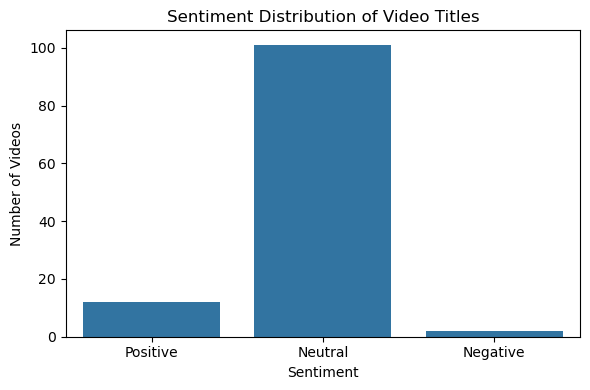

 'Tags' column not found — skipping tags sentiment analysis.
Sentiment analysis complete! Saved as 'youtube_with_sentiment.csv'


In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

# Check and download VADER lexicon if not already available
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    nltk.download('vader_lexicon')

# Load the dataset
df = pd.read_csv("cleaned_youtube_trending.csv")

# Helper to find column by keyword
def find_col(keyword):
    for col in df.columns:
        if keyword in col.lower():
            return col
    return None

# Detect column names
title_col = find_col('title')
tags_col = find_col('tag')

# Initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to compute sentiment score
def get_sentiment(text):
    if pd.isnull(text):
        return None
    return sid.polarity_scores(str(text))['compound']

# Classify sentiment category
def classify_sentiment(score):
    if pd.isnull(score):
        return 'Unknown'
    elif score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# ----------- Apply sentiment analysis on titles (if exists) -----------
if title_col:
    df['title_sentiment'] = df[title_col].apply(get_sentiment)
    df['title_sentiment_label'] = df['title_sentiment'].apply(classify_sentiment)

    # Plot sentiment distribution for titles
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='title_sentiment_label', order=['Positive', 'Neutral', 'Negative'])
    plt.title("Sentiment Distribution of Video Titles")
    plt.xlabel("Sentiment")
    plt.ylabel("Number of Videos")
    plt.tight_layout()
    plt.show()
else:
    print(" 'Title' column not found — skipping title sentiment analysis.")

# ----------- Apply sentiment analysis on tags (if exists) -----------
if tags_col:
    df['tags_sentiment'] = df[tags_col].apply(get_sentiment)
    df['tags_sentiment_label'] = df['tags_sentiment'].apply(classify_sentiment)

    # Plot sentiment distribution for tags
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='tags_sentiment_label', order=['Positive', 'Neutral', 'Negative'])
    plt.title("Sentiment Distribution of Video Tags")
    plt.xlabel("Sentiment")
    plt.ylabel("Number of Videos")
    plt.tight_layout()
    plt.show()
else:
    print(" 'Tags' column not found — skipping tags sentiment analysis.")

# ----------- Save final dataset -----------
df.to_csv("youtube_with_sentiment.csv", index=False)
print("Sentiment analysis complete! Saved as 'youtube_with_sentiment.csv'")